In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from simon import SimonCipher
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

2023-06-09 13:16:56.923520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def generate_dataset(num_samples):
    plaintexts = []
    ciphertexts = []
    keys = []

    for _ in range(num_samples):
        # Generate a random 32-bit plaintext
        plaintext = random.randint(0, (1 << 32) - 1)

        # Generate a random 64-bit key
        key = random.randint(0, (1 << 64) - 1)

        # Encrypt the plaintext using Simon block cipher
        cipher = SimonCipher(key, key_size=64, block_size=32)
        ciphertext = cipher.encrypt(plaintext)

        # Convert the plaintext, ciphertext, and key to binary strings
        plaintext_bits = np.array(list(format(plaintext, '032b')), dtype=int)
        ciphertext_bits = np.array(list(format(ciphertext, '032b')), dtype=int)
        key_bits = np.array(list(format(key, '064b')), dtype=int)

        plaintexts.append(plaintext_bits)
        ciphertexts.append(ciphertext_bits)
        keys.append(key_bits)

    # Convert the lists to NumPy arrays
    plaintexts = np.array(plaintexts)
    ciphertexts = np.array(ciphertexts)
    keys = np.array(keys)

    return plaintexts, ciphertexts, keys
  
    # Generate dataset with 1000 samples
plaintexts, ciphertexts, keys = generate_dataset(10000)


In [3]:
    with open('Sample_dataset.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Plaintext', 'Ciphertext', 'Key'])
        writer.writerows(zip(plaintexts, ciphertexts, keys))  

In [4]:
df = pd.read_csv('Sample_dataset.csv')
df.head()

,Plaintext,Ciphertext,Key
0,[0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0...,[1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1...,[0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0...
1,[1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1...,[1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0...,[1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1...
2,[1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1...,[1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0...,[1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1...
3,[1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0...,[0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0...,[0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1...
4,[1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0...,[1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0...,[1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0...


In [5]:



# Split the dataset into training and testing sets
train_plaintexts, test_plaintexts, train_ciphertexts, test_ciphertexts, train_keys, test_keys = train_test_split(
    plaintexts, ciphertexts, keys, test_size=0.2, random_state=42
)

# Define the neural network architecture
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(64,)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(64, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    return model
model = create_model()
# Train the model
model.fit(np.concatenate((train_plaintexts, train_ciphertexts), axis=1), train_keys, epochs=1000, batch_size=32)



2023-06-09 13:17:01.988193: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-09 13:17:01.989453: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-06-09 13:17:02.035657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 13:17:02.035937: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX330 computeCapability: 6.1
coreClock: 1.594GHz coreCount: 3 deviceMemorySize: 1.95GiB deviceMemoryBandwidth: 52.21GiB/s
2023-06-09 13:17:02.035974: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-09 13:17:02.037348: I tensorflow/stream_executor/platform/default

Epoch 1/1000
 36/250 [===>..........................] - ETA: 0s - loss: 0.2513  

2023-06-09 13:17:02.787804: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


250/250 [==============================] - 1s 1ms/step - loss: 0.2505
Epoch 2/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2493
Epoch 4/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2482
Epoch 5/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2455
Epoch 6/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2406
Epoch 7/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 8/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2202
Epoch 9/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2064
Epoch 10/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1910
Epoch 11/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1756
Epoch 12/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1610
Epoch 13/1000


250/250 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 195/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 196/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 197/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 198/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 199/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 200/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 201/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 202/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 203/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 204/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 205/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.

250/250 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 387/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 388/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 389/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 390/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 391/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 392/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 393/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 394/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 395/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 396/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 397/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.

250/250 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 579/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 580/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 581/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 582/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 583/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 584/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 585/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 586/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 587/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 588/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 589/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.

250/250 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 771/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 772/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 773/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0277
Epoch 774/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 775/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 776/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 777/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 778/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 779/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 780/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 781/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.

250/250 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 963/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 964/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 965/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0317
Epoch 966/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 967/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 968/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0314
Epoch 969/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 970/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 971/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0332
Epoch 972/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.0323
Epoch 973/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.

In [6]:
model.summary()
model.save('model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
Total params: 591,424
Trainable params: 591,424
Non-trainable params: 0
_________________________________________________________________


In [7]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

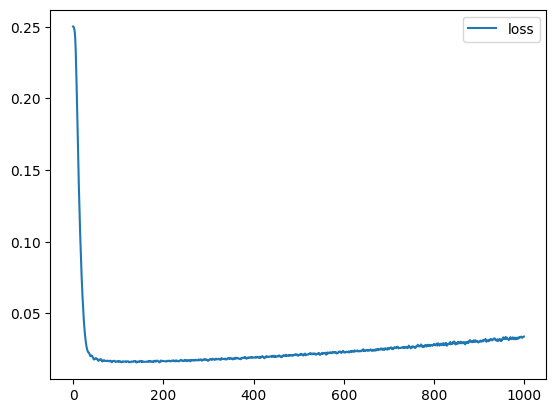

In [8]:
losses.plot()

In [9]:
#calculating loss
loss = model.evaluate(np.concatenate((test_plaintexts, test_ciphertexts), axis=1), test_keys)
print("Test Loss:", loss)

63/63 [==============================] - 0s 871us/step - loss: 0.4977
Test Loss: 0.49769988656044006


In [1]:
#predicting keys for the test data 
predicted_keys = model.predict(np.concatenate((test_plaintexts, test_ciphertexts), axis=1))

NameError: name 'model' is not defined

In [11]:
predicted_keys =np.where(predicted_keys < 0.5, 0, 1)

In [12]:
loss1 = model.evaluate(test_keys, predicted_keys)
print("Test Loss:", loss1)

63/63 [==============================] - 0s 1ms/step - loss: 0.4939
Test Loss: 0.4939155578613281


In [14]:
bap =np.mean(np.logical_not(np.logical_xor(test_keys, np.round(predicted_keys))), axis=0) 
print("Bit Accuracy Probability (BAP):", bap)

Bit Accuracy Probability (BAP): [0.4995 0.501  0.4925 0.501  0.5115 0.487  0.508  0.499  0.5075 0.488
 0.508  0.5075 0.5025 0.499  0.483  0.4995 0.5    0.4995 0.4705 0.4965
 0.508  0.5095 0.506  0.509  0.516  0.541  0.5205 0.5015 0.484  0.491
 0.4885 0.477  0.4955 0.499  0.5045 0.4865 0.503  0.522  0.5045 0.496
 0.5045 0.4855 0.5035 0.4865 0.524  0.5165 0.503  0.5    0.5045 0.512
 0.4985 0.4855 0.5035 0.5005 0.482  0.498  0.4985 0.496  0.5095 0.4835
 0.497  0.4975 0.4815 0.5205]


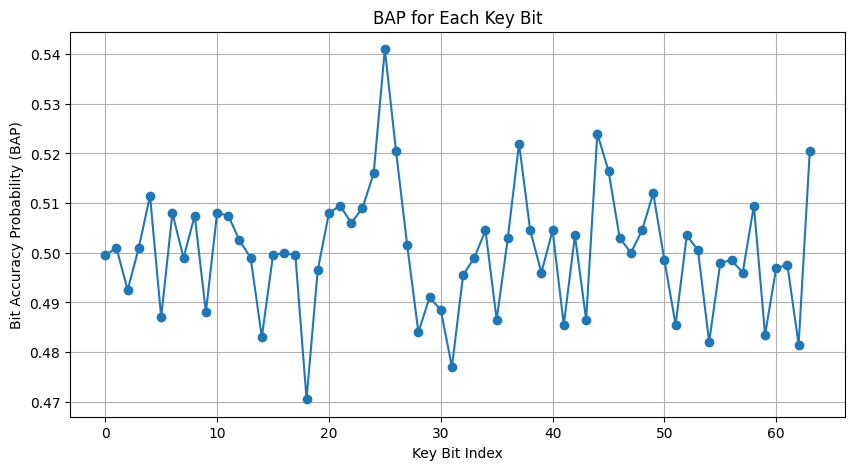

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(range(64), bap, marker='o')
plt.xlabel('Key Bit Index')
plt.ylabel('Bit Accuracy Probability (BAP)')
plt.title('BAP for Each Key Bit')
plt.grid(True)
plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ptexts=[]
ctexts=[]
ks=[]

ptext = random.randint(0, (1 << 32) - 1)

# Generate a random 64-bit key
k = random.randint(0, (1 << 64) - 1)

# Encrypt the plaintext using Simon block cipher
c = SpeckCipher(k, key_size=64, block_size=32)
ctext = c.encrypt(ptext)

# Convert the plaintext, ciphertext, and key to binary strings
ptext_bits = np.array(list(format(ptext, '032b')), dtype=int)
ctext_bits = np.array(list(format(ctext, '032b')), dtype=int)
k_bits = np.array(list(format(k, '064b')), dtype=int)

ptexts.append(ptext_bits)
ctexts.append(ctext_bits)
ks.append(k_bits)

# Convert the lists to NumPy arrays
ptexts = np.array(ptexts)
ctexts = np.array(ctexts)
ks = np.array(k)


p_keys = model.predict(np.concatenate((ptexts, ctexts), axis=1))

In [ ]:
ks

In [ ]:
p_keys = np.where(p_keys < 0.5, 0, 1)

In [ ]:
p_keys